In [ ]:
#1 linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

hours_studied = np.array([2, 3, 4, 5, 6]).reshape(-1,1)
exam_scores = np.array([70, 75, 85, 90, 95])
model = LinearRegression()
model.fit(hours_studied,exam_scores)     #model_fit(independent,dependent)
new = np.array([7]).reshape(-1,1)
predicted_scores = model.predict(new)

print("Predicted exam score for 7 hours studied:", predicted_scores)

Predicted exam score for 7 hours studied: [102.5]


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             20640
latitude              20640
housing_median_age 

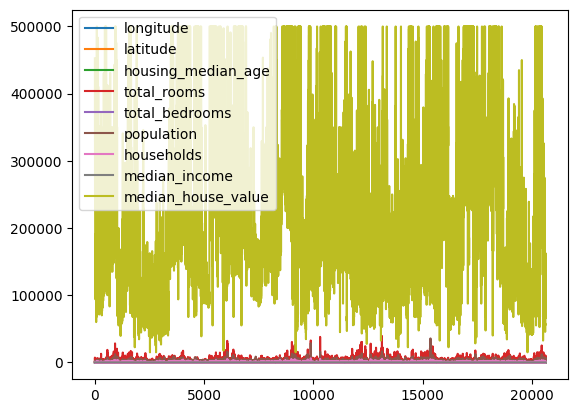

                       longitude      latitude  housing_median_age  \
longitude               4.014139     -3.957054           -2.728244   
latitude               -3.957054      4.562293            0.300346   
housing_median_age     -2.728244      0.300346          158.396260   
total_rooms           194.803750   -168.217847        -9919.120060   
total_bedrooms         58.768508    -60.299623        -1700.312817   
population            226.377839   -263.137814        -4222.270582   
households             42.368072    -58.010245        -1457.581290   
median_income          -0.057765     -0.323860           -2.846140   
median_house_value -10627.425205 -35532.559074       153398.801329   

                     total_rooms  total_bedrooms    population    households  \
longitude           1.948037e+02    5.876851e+01  2.263778e+02  4.236807e+01   
latitude           -1.682178e+02   -6.029962e+01 -2.631378e+02 -5.801024e+01   
housing_median_age -9.919120e+03   -1.700313e+03 -4.222271e

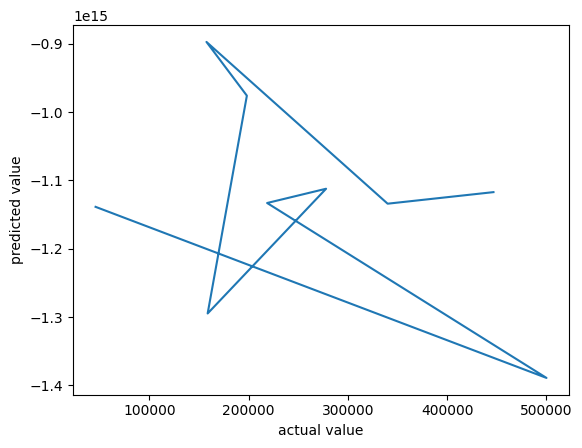

In [42]:
#2 gradient decent
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

path="/content/housing.csv"

#import datset

data=pd.read_csv(path)
print(data.head()) #displaying 5 rows of data


count=data.count()
print(count)

#to print number of null values
print(data.isnull().sum())

data.plot()
plt.show()

#cov matrix and corr matrix
cov_mat=data.cov(numeric_only=True)
corr_mat=data.corr(numeric_only=True)
print(cov_mat)
print(corr_mat)

#train and test model

X=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])
X_encoded.fillna(data["total_bedrooms"].mean(), inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.09,random_state=42)

model=SGDRegressor()
model.fit(X_train,y_train)

#predicting values

y_pred=model.predict(X_test)
print(y_pred)


#accuracy and its graph
mse = mean_squared_error(y_test, y_pred)
a = 1 - (mse / np.var(y_test))

print(f"the accuracy of the model is : {a}")

plt.plot(y_test[1:10],y_pred[1:10])
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()


   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa
ID              150
Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64
ID              False
Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool
ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


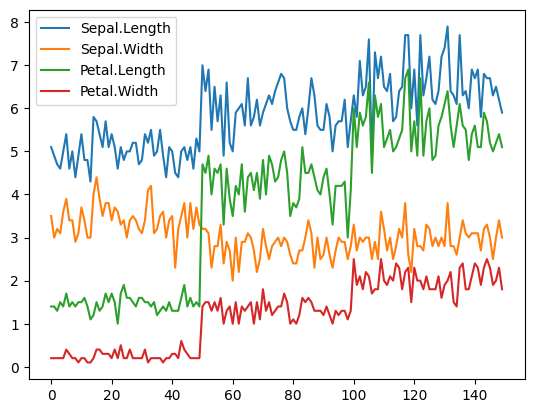

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      0.685694    -0.042434      1.274315     0.516271
Sepal.Width      -0.042434     0.189979     -0.329656    -0.121639
Petal.Length      1.274315    -0.329656      3.116278     1.295609
Petal.Width       0.516271    -0.121639      1.295609     0.581006
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000
['versicolor' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'versic

<ipython-input-17-77648cbfcf6a>:21: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_mat=iris.cov()
<ipython-input-17-77648cbfcf6a>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=iris.corr()


In [17]:
#3
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

iris_df = pd.read_csv("/content/IRIS.csv")
print(iris_df.head())

print(iris_df.count())

print(iris_df.isnull().any()) #to check null values are present or not
print(iris_df.isnull().sum()) #to print number of null values

iris=iris_df.drop(['ID'],axis=1)
iris.plot()                       #graph representation
plt.show()

cov_mat=iris.cov()
print(cov_mat)

corr_mat=iris.corr()
print(corr_mat)

X=iris.drop(["Species"],axis=1)  #to train and test model
y=iris["Species"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)

a=accuracy_score(y_test,y_pred)
print(f"the accuracy is : {a}")


[6 5 4 ... 1 9 7]
the accuracy is : 0.9686904761904762


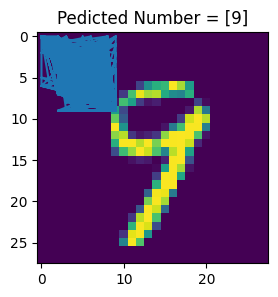

In [33]:
#4  mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def show_digit(no):
    pred_no = KNN.predict([X_test[no]])
    img_array = X_test[no].reshape((28,28))
    plt.figure(figsize=(3, 3))
    plt.title(f"Pedicted Number = {pred_no}")
    plt.imshow(img_array)

df = pd.read_csv("/content/train.csv")

X = df.values[:,1:]
y = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
print(y_pred)

a=accuracy_score(y_test,y_pred)
print(f"the accuracy is : {a}")

show_digit(20)

plt.plot(y_test,y_pred)
plt.show()



In [ ]:
#  5  FIND S

import csv

def find_s(training_data):
    hypothesis=[]
    hypothesis = training_data[0][:-1]
    for example in training_data:
        features = example[:-1]
        label = example[-1]
        if label == 'Yes':
            for i in range(len(hypothesis)):
                if hypothesis[i] != features[i]:
                    hypothesis[i] = '?'
            print(hypothesis)
    return hypothesis

training_data = []
with open('enjoysport.csv.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        training_data.append(row)
    print(training_data)
    training_data.pop(0)
    print(training_data)

h = find_s(training_data)
print("Most specific hypothesis:", h)



[['Sky', 'Airtemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'WaterSport'], ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'], ['Cloudy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']]
[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'], ['Cloudy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']]
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
['Sunny', 'Warm', '?', 'Strong', '?', '?']
Most specific hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [ ]:
# 6 candidate elimination
import numpy as np
import pandas as pd

data = pd.DataFrame(data=pd.read_csv('enjoysport.csv.csv'))
concepts = np.array(data.iloc[:,:-1])
print(concepts)

target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1, "is", h)
        if target[i] == "Yes":
            print("Instance is Positive")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            print("Instance is Negative")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Boundary after", i+1, "Instance is", specific_h)
        print("Generic Boundary after", i+1, "Instance is", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])

    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")




[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Cloudy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Instance is Positive
Specific Boundary after 1 Instance is ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Generic Boundary after 1 Instance is [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
Instance is Positive
Specific Boundary after 2 Instance is ['Sunny'

Predicted class for the new sample: no


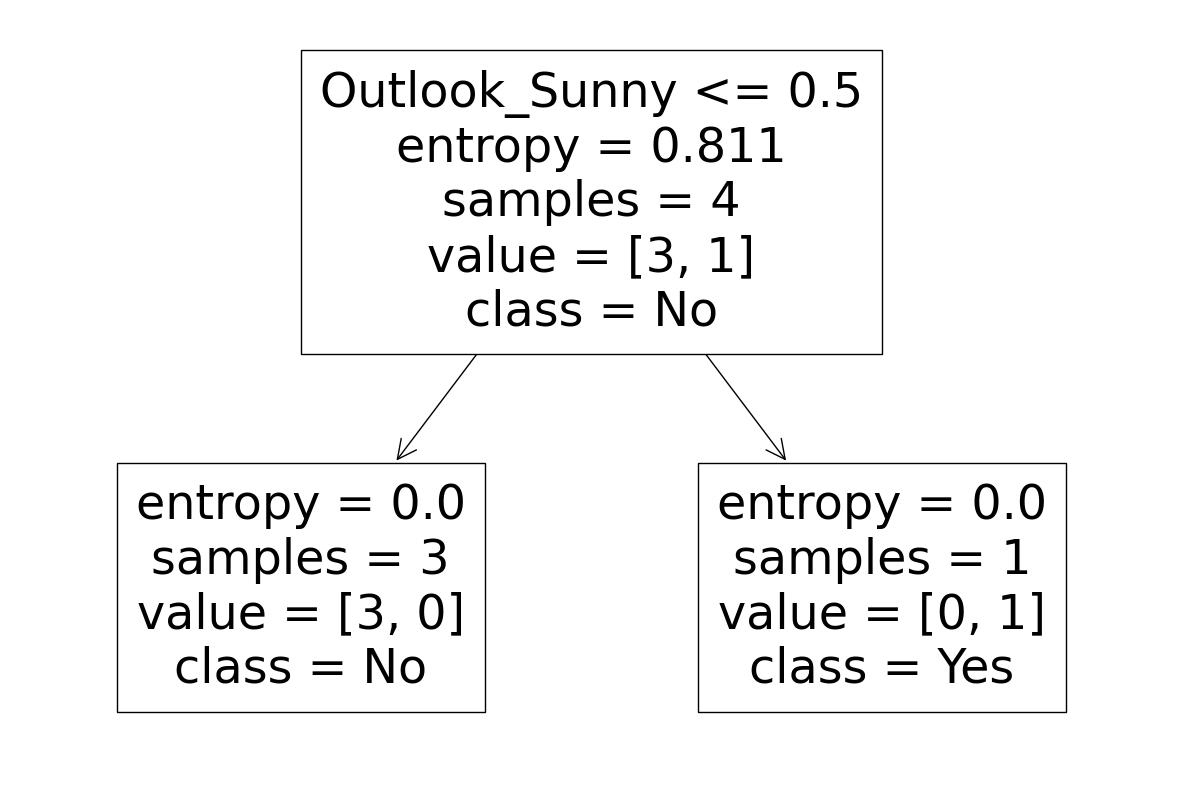

In [35]:
# 7ID3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

path = "/content/testtennis.csv"
data = pd.read_csv(path)

X = data.drop('playtennis', axis=1)
y = data['playtennis']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

new_sample = X_test.iloc[[0]]
predicted_class = decision_tree.predict(new_sample)

print("Predicted class for the new sample:", predicted_class[0])

plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=X_encoded.columns, class_names=['No', 'Yes'])
plt.show()


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 7692.9087 - val_loss: 8401.7930
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 7688.9844 - val_loss: 8388.5908
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 7685.0610 - val_loss: 8375.3535
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 7681.1377 - val_loss: 8362.0898
Epoch 5/100
1/1 [==============================] - 0s 72ms/step - loss: 7677.2168 - val_loss: 8348.7910
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 7673.2939 - val_loss: 8335.4482
Epoch 7/100
1/1 [==============================] - 0s 65ms/step - loss: 7669.3687 - val_loss: 8322.0605
Epoch 8/100
1/1 [==============================] - 0s 42ms/step - loss: 7665.4521 - val_loss: 8308.6230
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 7661.5322 - val_loss: 8295.1328
Epoch 10/100
1/1 [==============================] - 0s 42ms/step -

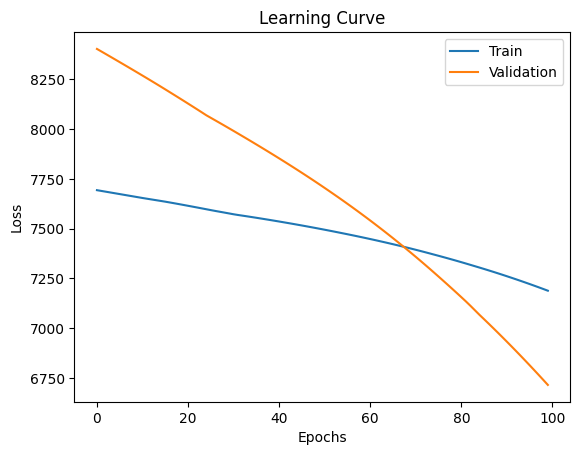

In [ ]:
# 8  ANN
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = np.array(([2, 9],[1, 5],[3, 6]), dtype=float)
y=np.array(([92],[86],[89]),dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [43]:
#9
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

text_data = [
    "I love this sandwich, pos",
    "This is an amazing place, pos",
    "I feel very good about these cheese, pos",
    "This is my best work, pos",
    "What an awesome view, pos",
    "I do not like this restaurant, neg",
    "I am tired of this stuff, neg",
    "I can't deal with this, neg",
    "He is my sworn enemy, neg",
    "My boss is horrible, neg",
    "This is an awesome place, pos",
    "I do not like the taste of this juice, neg",
    "I love to dance, pos",
    "I am sick and tired of this place, neg",
    "What a great holiday, pos",
    "That is a bad locality to stay, neg",
    "We will have good fun tomorrow, pos",
    "I went to my enemy's house today, neg"
]

labels = ['pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg']

df = pd.DataFrame({'text': text_data, 'label': labels})


X = df['text']
y = df['label']


vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='pos')
precision = precision_score(y_test, y_pred, pos_label='pos')
confusion_mat = confusion_matrix(y_test, y_pred)

print("Total Instances of Dataset:", len(df))
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion_mat)


Total Instances of Dataset: 18
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Confusion Matrix:
[[2 0]
 [0 2]]


In [44]:
#10
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


data = {
    'VAR1': [1.713, 0.180, 0.353, 0.940, 1.486, 1.266, 1.540, 0.459, 0.773],
    'VAR2': [1.586, 1.786, 1.240, 1.566, 0.759, 1.106, 0.419, 1.799, 0.186],
    'CLASS': [0, 1, 1, 0, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[['VAR1', 'VAR2']]

kmeans_model = KMeans(n_clusters=3, random_state=42)

kmeans_model.fit(X)

new_case = np.array([[0.906, 0.606]])
predicted_cluster = kmeans_model.predict(new_case)

print("Predicted cluster for the new case:", predicted_cluster[0])


Predicted cluster for the new case: 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             20640
latitude              20640
housing_median_age 

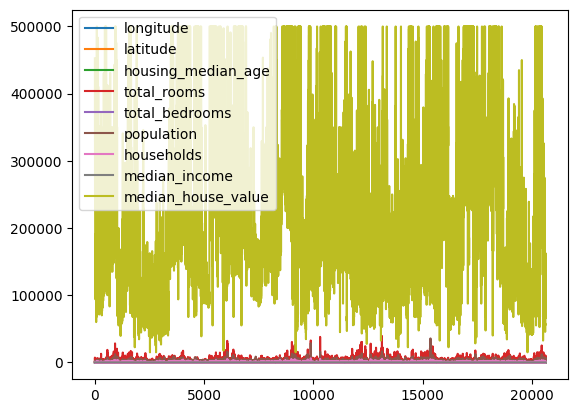

                       longitude      latitude  housing_median_age  \
longitude               4.014139     -3.957054           -2.728244   
latitude               -3.957054      4.562293            0.300346   
housing_median_age     -2.728244      0.300346          158.396260   
total_rooms           194.803750   -168.217847        -9919.120060   
total_bedrooms         58.768508    -60.299623        -1700.312817   
population            226.377839   -263.137814        -4222.270582   
households             42.368072    -58.010245        -1457.581290   
median_income          -0.057765     -0.323860           -2.846140   
median_house_value -10627.425205 -35532.559074       153398.801329   

                     total_rooms  total_bedrooms    population    households  \
longitude           1.948037e+02    5.876851e+01  2.263778e+02  4.236807e+01   
latitude           -1.682178e+02   -6.029962e+01 -2.631378e+02 -5.801024e+01   
housing_median_age -9.919120e+03   -1.700313e+03 -4.222271e

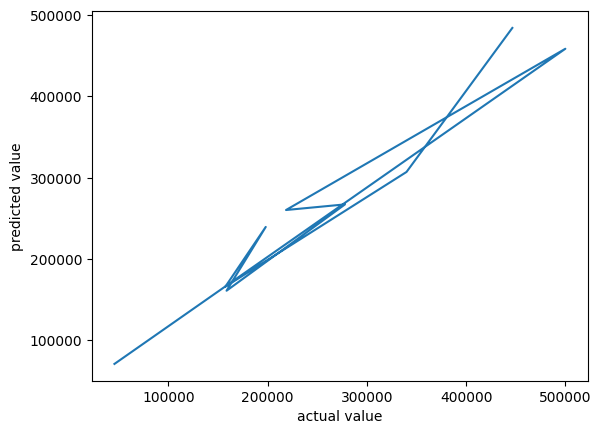

In [5]:
#11
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

path="/content/housing.csv"

#import datset

data=pd.read_csv(path)
print(data.head()) #displaying 5 rows of data


count=data.count()
print(count)

#to print number of null values
print(data.isnull().sum())

#graph representation
data.plot()
plt.show()

#cov matrix and corr matrix
cov_mat=data.cov(numeric_only=True)
corr_mat=data.corr(numeric_only=True)
print(cov_mat)
print(corr_mat)

#train and test model

X=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])
X_encoded.fillna(data["total_bedrooms"].mean(), inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.09,random_state=42)

model=RandomForestRegressor()
model.fit(X_train,y_train)

#predicting values

y_pred=model.predict(X_test)
print(y_pred)


#accuracy and its graph
mse = mean_squared_error(y_test, y_pred)
a = 1 - (mse / np.var(y_test))

print(f"the accuracy of the model is : {a}")

plt.plot(y_test[1:10],y_pred[1:10])
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()


In [1]:
#12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


path= "/content/HEART DISEASE.csv"  # Replace with the actual path
data = pd.read_csv(path)


X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

y_pred = naive_bayes_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[26  3]
 [ 5 27]]


   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


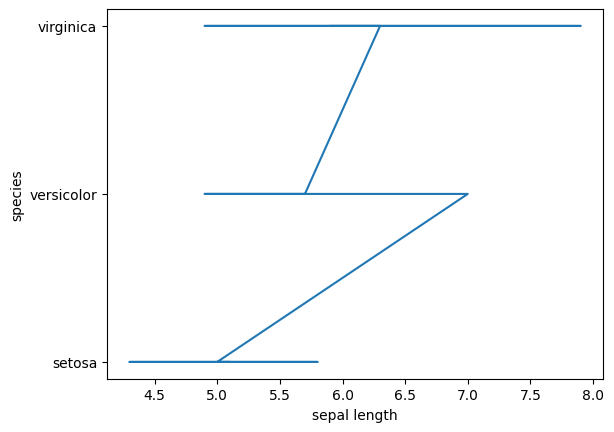

['setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica'
 'versicolor']
the accuracy is : 1.0


In [9]:
#13
from sklearn.neighbors import KNeighborsClassifier
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

path="/content/IRIS.csv"

data=pd.read_csv(path)
print(data.head())

x=data["Sepal.Length"]
y=data["Species"]
plt.xlabel("sepal length")
plt.ylabel("species")
plt.plot(x,y)
plt.show()

X=data.drop(["Species"],axis=1)
y=data["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

model=KNeighborsClassifier()
model.fit(X,y)

y_pred=model.predict(X_test)
print(y_pred)

a=accuracy_score(y_test,y_pred)
print(f"the accuracy is : {a}")

In [15]:
#14
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate sample data with a known curve (linear or non-linear)
# For this example, we'll use a non-linear curve y = sin(x) + noise
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(80)

# Step 2: Set the value for the smoothing parameter (t)
t = 0.1

# Step 3: Set the bias/point of interest (x0)
x0 = 2.5

# Step 4: Determine the weight matrix using Gaussian Kernel
weights = np.exp(-0.5 * ((X - x0) / t) ** 2)
print(weights)

# Step 5: Determine the value of model term parameter B using Locally Weighted Regression
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
W = np.diag(weights.ravel())
B = np.linalg.inv(X_with_bias.T @ W @ X_with_bias) @ X_with_bias.T @ W @ y

# Step 6: Prediction
x0_with_bias = np.array([1, x0])
prediction = x0_with_bias @ B

print("Prediction at x0:", prediction)


[[1.83739085e-133]
 [1.68894274e-125]
 [2.03904057e-118]
 [5.30867391e-113]
 [2.12866551e-112]
 [9.62137954e-107]
 [1.99594700e-103]
 [3.18507492e-099]
 [5.45744491e-099]
 [1.17916018e-092]
 [1.34021275e-088]
 [7.87480360e-081]
 [2.80882811e-078]
 [2.79461952e-071]
 [1.01175986e-070]
 [5.71628144e-065]
 [5.83609198e-065]
 [1.17301710e-059]
 [1.10295258e-055]
 [3.86244205e-055]
 [1.21373486e-054]
 [6.67797511e-051]
 [5.28014710e-050]
 [1.08531813e-049]
 [1.19763063e-045]
 [2.58274137e-032]
 [4.15115292e-029]
 [8.87010118e-027]
 [2.18245929e-024]
 [3.51568124e-024]
 [1.57288679e-021]
 [1.88619761e-021]
 [5.67348334e-020]
 [2.73759526e-017]
 [7.25368307e-012]
 [1.33442238e-011]
 [2.01759210e-010]
 [2.85205165e-009]
 [1.87229203e-007]
 [3.05996865e-003]
 [1.13657025e-002]
 [8.96082526e-002]
 [9.71340945e-001]
 [7.76255123e-001]
 [6.04467821e-001]
 [4.64821818e-001]
 [1.02417837e-001]
 [6.53947862e-002]
 [2.31025935e-005]
 [6.26515447e-006]
 [5.19990277e-006]
 [2.81567933e-006]
 [5.26313411